<a href="https://colab.research.google.com/github/kunalsir98/Deep_learning/blob/main/twiter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
!nvidia-smi


Mon Jul 29 06:23:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0              31W /  70W |    107MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [118]:
#!unzip /content/dataset.zip

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [120]:
df=pd.read_csv('twitter.csv')

In [121]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [122]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [123]:
df.duplicated().sum()

0

In [124]:
df.drop(columns=['id'],axis=1,inplace=True)

In [125]:
df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


<Axes: xlabel='label', ylabel='count'>

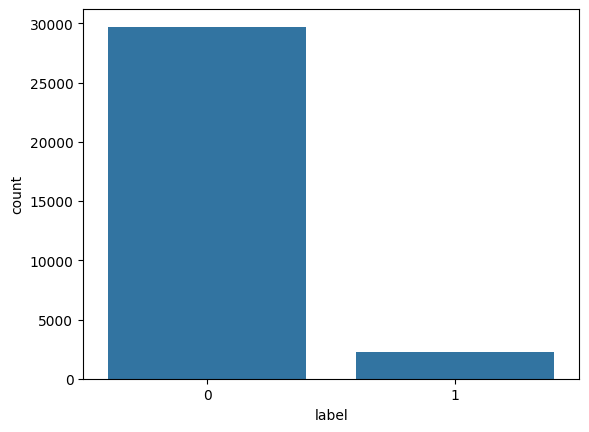

In [126]:
sns.countplot(x='label', data=df)

In [127]:
!pip install nltk

In [128]:
import nltk
from nltk.corpus import stopwords
import re
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [129]:
# Let's apply stemming and stopwords on the data
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

In [130]:

# Let's apply regex and do cleaning.
def data_cleaning(words):
    words = str(words).lower()
    words = re.sub('', '', words)
    words = re.sub('https?://\S+|www\.\S+', '', words)
    words = re.sub('<.*?>+', '', words)
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words = re.sub('\n', '', words)
    words = re.sub('\w*\d\w*', '', words)
    words = [word for word in words.split(' ') if words not in stopword]
    words=" ".join(words)
    words = [stemmer.stem(words) for word in words.split(' ')]
    words=" ".join(words)

    return words

In [131]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [132]:
df['tweet']=df['tweet'].apply(data_cleaning)

In [133]:
df

,label,tweet
0,0,user when a father is dysfunctional and is so...
1,0,user user thanks for lyft credit i cant use ca...
2,0,bihday your majesti bihday your majesti ...
3,0,model i love u take with u all the time in u...
4,0,factsguide society now motiv factsguide s...
...,...,...
31957,0,ate user isz that youuuðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,user sikh temple vandalised in in calgary wso ...


In [134]:
df['tweet'][1]

'user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx    disapointed getthank user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx    disapointed getthank user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx    disapointed getthank user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx    disapointed getthank user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx    disapointed getthank user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx    disapointed getthank user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx    disapointed getthank user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx    disapointed getthank user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx    dis

In [135]:
df.iloc[0]['tweet']

' user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run

In [136]:
# Example data (ensure your actual data is properly loaded)
x = df.drop('label', axis=1).values  # Features
y = df['label'].values               # Target

print(x.shape)  # Should be (31962, n) where n is the number of features
print(y.shape)  # Should be (31962,)


(31962, 1)
(31962,)


In [137]:
from sklearn.model_selection import train_test_split

In [138]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42)

print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

23971 23971
7991 7991


In [139]:
# Convert x_train to a list of strings
x_train_list = x_train.tolist()

In [140]:
docs = ['recurrent neural network',
		'neural network',
		'artificial neural',
		'connections between nodes',
		'can create a cycle',
		'allowing output',
		'some nodes to affect subsequent',
		'exhibit temporal',
		'dynamic behavior',
		'type of Neural Network',
    'affect subsequent']

In [141]:

from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()

In [142]:

tokenizer.fit_on_texts(docs)

In [143]:

sequences = tokenizer.texts_to_sequences(docs)
sequences


[[6, 1, 2],
 [1, 2],
 [7, 1],
 [8, 9, 3],
 [10, 11, 12, 13],
 [14, 15],
 [16, 3, 17, 4, 5],
 [18, 19],
 [20, 21],
 [22, 23, 1, 2],
 [4, 5]]

In [144]:

from keras.utils import pad_sequences
sequences = pad_sequences(sequences,padding='post')
sequences



array([[ 6,  1,  2,  0,  0],
       [ 1,  2,  0,  0,  0],
       [ 7,  1,  0,  0,  0],
       [ 8,  9,  3,  0,  0],
       [10, 11, 12, 13,  0],
       [14, 15,  0,  0,  0],
       [16,  3, 17,  4,  5],
       [18, 19,  0,  0,  0],
       [20, 21,  0,  0,  0],
       [22, 23,  1,  2,  0],
       [ 4,  5,  0,  0,  0]], dtype=int32)

In [145]:

from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [146]:


model = Sequential()
model.add(Embedding(23,output_dim=2,input_length=5)) #Total vocab len, ouput dim(per word would be represend by 2 vector), input len per row

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 5, 2)              46        
                                                                 
Total params: 46 (184.00 Byte)
Trainable params: 46 (184.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [147]:
import pandas as pd

x_train_df = pd.DataFrame(x_train)
print(x_train_df.head())


                                                   0
0  have a   weekend  have a   weekend  have a   w...
1  the world really is going bonkers and its  rea...
2  made my night hahahha  made my night hahahha  ...
3  shes looking like a really good person stupid ...
4  must be the first year ever where xbox and pla...


In [148]:

x_train.shape


(23971, 1)

In [149]:

## Count unique Vocabulary
all_words = [word for sentence in df.tweet for word in sentence.split()]

unique_words = set(all_words)
# unique_words = (all_words)
vocab_size = len(unique_words)

print("Vocabulary Size:", vocab_size)

Vocabulary Size: 45425


In [151]:


max_words = 50000
max_len = 300
tokenizer = Tokenizer(num_words=max_words)


In [152]:
# Fit the tokenizer on the list of text data
tokenizer.fit_on_texts(x_train_list)

In [154]:


sequences = tokenizer.texts_to_sequences(x_train_list)

In [155]:

sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [156]:


sequences_matrix

array([[    0,     0,     0, ...,     0,     0,   538],
       [    0,     0,     0, ...,     0,     0,   539],
       [    0,     0,     0, ...,     0,     0,   540],
       ...,
       [    0,     0,     0, ...,     0,     0, 22238],
       [    0,     0,     0, ...,     0,     0, 22239],
       [    0,     0,     0, ...,     0,     0, 22240]], dtype=int32)

In [157]:


from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, SpatialDropout1D
from keras.optimizers import RMSprop

In [158]:

# Creating model architecture

model = Sequential()
model.add(Embedding(max_words, 100, input_length = max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 300, 100)          5000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 300, 100)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 5080501 (19.38 MB)
Trainable params: 5080501 (19.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [159]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])


In [160]:

# starting model training
history = model.fit(sequences_matrix,y_train,batch_size=128,epochs = 1,validation_split=0.2)

150/150 [==============================] - 157s 999ms/step - loss: 0.2645 - accuracy: 0.9298 - val_loss: 0.2572 - val_accuracy: 0.9293


In [161]:

x_test

array([[' user â\x80\x9cmy mom says my smile is captivatingâ\x80¦ i says happy sundayð\x9f\x91\x85 pugsley luigi  smile   sunday pug pugs    user â\x80\x9cmy mom says my smile is captivatingâ\x80¦ i says happy sundayð\x9f\x91\x85 pugsley luigi  smile   sunday pug pugs    user â\x80\x9cmy mom says my smile is captivatingâ\x80¦ i says happy sundayð\x9f\x91\x85 pugsley luigi  smile   sunday pug pugs    user â\x80\x9cmy mom says my smile is captivatingâ\x80¦ i says happy sundayð\x9f\x91\x85 pugsley luigi  smile   sunday pug pugs    user â\x80\x9cmy mom says my smile is captivatingâ\x80¦ i says happy sundayð\x9f\x91\x85 pugsley luigi  smile   sunday pug pugs    user â\x80\x9cmy mom says my smile is captivatingâ\x80¦ i says happy sundayð\x9f\x91\x85 pugsley luigi  smile   sunday pug pugs    user â\x80\x9cmy mom says my smile is captivatingâ\x80¦ i says happy sundayð\x9f\x91\x85 pugsley luigi  smile   sunday pug pugs    user â\x80\x9cmy mom says my smile is captivatingâ\x80¦ i says happy sund

In [163]:
x_test_list=x_test.tolist()

In [164]:


test_sequences = tokenizer.texts_to_sequences(x_test_list)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [165]:

# Model evaluation
accr = model.evaluate(test_sequences_matrix,y_test)

250/250 [==============================] - 24s 95ms/step - loss: 0.2548 - accuracy: 0.9300


In [167]:



lstm_prediction = model.predict(test_sequences_matrix)

250/250 [==============================] - 23s 93ms/step


In [168]:


lstm_prediction

array([[0.08433618],
       [0.08433618],
       [0.08433618],
       ...,
       [0.08433618],
       [0.08433618],
       [0.08433618]], dtype=float32)

In [169]:


res = []
for prediction in lstm_prediction:
    if prediction[0] < 0.5:
        res.append(0)
    else:
        res.append(1)

In [170]:

 #res

In [171]:


from sklearn.metrics import confusion_matrix

In [172]:


print(confusion_matrix(y_test,res))

[[7432    0]
 [ 559    0]]


In [173]:


import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [174]:


# Let's save the mdoel.
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [175]:



import keras


In [176]:

load_model=keras.models.load_model("model.h5")

In [177]:

with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [180]:

# Let's test our model on custom data.
test = 'i love this movie'

def clean_text(text):
    print(text)
    text = str(text).lower()

    text = re.sub('', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

test=[clean_text(test)]
print(test)

seq = load_tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen=300)
# print(seq)

pred = load_model.predict(padded)

print("pred", pred)
if pred<0.5:
    print("positive")
else:
    print("negative")


i love this movie
i love this movie
['love movi']
1/1 [==============================] - 0s 162ms/step
pred [[0.0843362]]
positive
